In [172]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle, islice
import pandas as pd
import numpy as np

In [73]:
Rental_DF = pd.DataFrame(pd.read_csv("Toronto_apartment_rentals_2018.csv"))

In [74]:
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


In [76]:
# Convert Price column string value to float
Rental_DF["Price"] = Rental_DF["Price"].replace('[\$,]', '', regex=True).astype(float)
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


In [110]:
Crime_DF = pd.DataFrame(pd.read_csv("MCI_2014_to_2018.csv"))
Crime_DF.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,...,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,...,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005


In [111]:
# Rental price (bin)
bins=[50.90,1000.90,2000.90,3000.90,4000.90,5000.90,10000.90,50000.90,600000.90]
group_name=["50-1000$","1001-2000$","2001-3000$","3001-4000$","4001-5000$","5001-10000$","10001-50000$","50001-600000$"]
Rental_DF["Price Range"] = pd.cut(Rental_DF["Price"],bins,labels=group_name)
groupAnalysis_ByRentalPrice = Rental_DF.groupby(['Price Range'])
Property_count=groupAnalysis_ByRentalPrice["Address"].count()
Rental_analysis=pd.DataFrame({"Total Rental Properties":Property_count})

Rental_analysis

,Total Rental Properties
Price Range,
50-1000$,41
1001-2000$,463
2001-3000$,511
3001-4000$,90
4001-5000$,11
5001-10000$,4
10001-50000$,1
50001-600000$,3


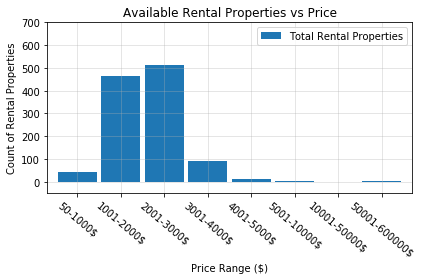

In [221]:
#Plot the bar graph for Rental properties by price range
Rental_analysis.plot.bar(width=.9)
# Orient widths. Add labels, tick marks, etc. 
plt.title("Available Rental Properties vs Price")
plt.xlabel("Price Range ($)")
plt.ylabel("Count of Rental Properties")
plt.ylim(-50,700)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [112]:
Crime_DF.columns


Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'ObjectId'],
      dtype='object')

In [222]:
Crime_Data=Crime_DF[['event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype','offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour','Neighbourhood', 'MCI','Division']]
Crime_Data

,event_unique_id,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Neighbourhood,MCI,Division
0,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,Theft Over,2014,June,20,171,Friday,13,2014.0,June,20.0,171.0,Friday,10,Bay Street Corridor (76),Theft Over,D52
1,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Newtonbrook West (36),Assault,D32
2,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Newtonbrook West (36),Robbery,D32
3,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,B&E,2014,July,2,183,Wednesday,5,2014.0,July,2.0,183.0,Wednesday,1,Malvern (132),Break and Enter,D42
4,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,Assault,2014,July,2,183,Wednesday,20,2014.0,July,2.0,183.0,Wednesday,20,Milliken (130),Assault,D42
5,GO-20142524077,2014-07-18T00:01:00.000Z,2014-07-18T17:36:00.000Z,House,B&E,2014,July,18,199,Friday,17,2014.0,July,18.0,199.0,Friday,0,Clairlea-Birchmount (120),Break and Enter,D41
6,GO-20142526048,2014-07-18T23:15:00.000Z,2014-07-18T23:15:00.000Z,House,Assault,2014,July,18,199,Friday,23,2014.0,July,18.0,199.0,Friday,23,Yorkdale-Glen Park (31),Assault,D13
7,GO-20142528713,2014-07-19T01:30:00.000Z,2014-07-19T11:58:00.000Z,Outside,Robbery With Weapon,2014,July,19,200,Saturday,11,2014.0,July,19.0,200.0,Saturday,1,Bay Street Corridor (76),Robbery,D52
8,GO-20142531700,2014-07-19T15:00:00.000Z,2014-07-19T22:11:00.000Z,House,B&E W'Intent,2014,July,19,200,Saturday,22,2014.0,July,19.0,200.0,Saturday,15,Malvern (132),Break and Enter,D42
9,GO-20142536209,2014-07-20T01:30:00.000Z,2014-07-20T16:33:00.000Z,Other,B&E W'Intent,2014,July,20,201,Sunday,16,2014.0,July,20.0,201.0,Sunday,1,Englemount-Lawrence (32),Break and Enter,D13


In [223]:
# Crime Analysis by Majior Crime Indicator
Crime_Analysis = Crime_Data.groupby(['MCI'])
Count_Offence=group_Analysis["event_unique_id"].count()
Offence_data=pd.DataFrame({"Total Count of Offence":Count_Offence})
Offence_data


,Total Count of Offence
MCI,
Assault,90878
Auto Theft,18178
Break and Enter,34911
Robbery,18128
Theft Over,5430


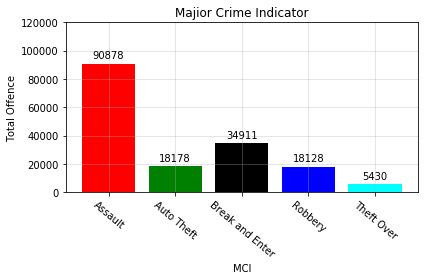

In [224]:
#Plot the bar graph for Majior Crime Indicator

x=["Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]
fig, ax = plt.subplots()
rect1=ax.bar(x,Offence_data["Total Count of Offence"],color=[ 'red', 'green','black', 'blue', 'cyan'])

# Orient widths. Add labels, tick marks, etc. 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect1)
plt.title("Majior Crime Indicator")
plt.xlabel("MCI")
plt.ylabel("Total Offence")

#Lable Each Bar
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [225]:
#Crime Analysis by year from 2000 to 2018
Crime_Analysis1 = Crime_Data.groupby(['occurrenceyear'])
Count_by_year=Crime_Analysis1["event_unique_id"].count()
CountByYear_Data=pd.DataFrame({"Total count of offence":Count_by_year})
CountByYear_Data

,Total count of offence
occurrenceyear,
2000.0,14
2001.0,12
2002.0,7
2003.0,9
2004.0,12
2005.0,16
2006.0,8
2007.0,22
2008.0,33


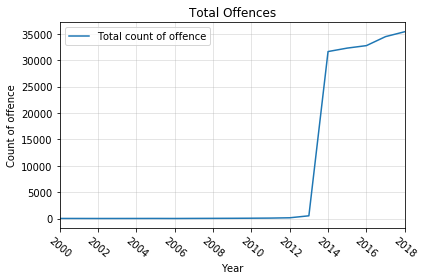

In [226]:
#Plot the line graph for Total offence by Year 2000 to 2018

CountByYear_Data.plot()

# Orient widths. Add labels, tick marks, etc. 
plt.title("Total Offences")

plt.xlabel("Year")
plt.ylabel("Count of offence")
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [227]:
# Crime Analysis by Most Occurence of the week day
Crime_Analysis2 = Crime_Data.groupby(['occurrencedayofweek'])
CountByDay=Crime_Analysis2["event_unique_id"].count()
OffenceByDay_data=pd.DataFrame({"Total Count of Offence":CountByDay})
OffenceByDay_data

,Total Count of Offence
occurrencedayofweek,
Friday,25442
Monday,23083
Saturday,25187
Sunday,24284
Thursday,23439
Tuesday,22779
Wednesday,23262


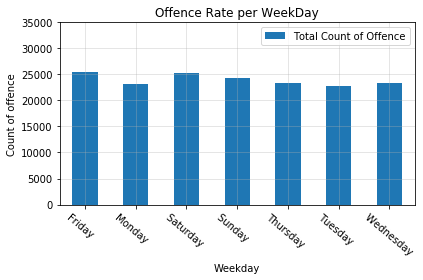

In [235]:
#Plot the Bar graph for Total offence by Weekday's

OffenceByDay_data.plot.bar()

# Orient widths. Add labels, tick marks, etc. 
plt.title("Offence Rate per WeekDay")
plt.xlabel("Weekday")
plt.ylabel("Count of offence")
plt.ylim(0,35000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [228]:
# Crime Analysis by Most Occurence of the Month
Crime_Analysis3 = Crime_Data.groupby(['occurrencemonth'])
CountByMonth=Crime_Analysis3["event_unique_id"].count()
OffenceByMonth_data=pd.DataFrame({"Total Count of Offence":CountByMonth})
OffenceByMonth_data

,Total Count of Offence
occurrencemonth,
April,13414
August,14536
December,13683
February,11809
January,13311
July,14669
June,14450
March,13070
May,14559


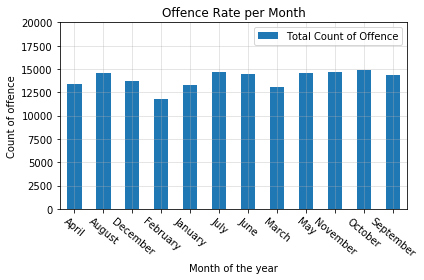

In [239]:
#Plot the Bar graph for Total offence by Month of the year

OffenceByMonth_data.plot.bar()

# Orient widths. Add labels, tick marks, etc. 
plt.title("Offence Rate per Month")
plt.xlabel("Month of the year")
plt.ylabel("Count of offence")
plt.ylim(0,20000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [243]:
data=Crime_Data['Neighbourhood'].value_counts().unique()
Crime_Analysis4 = Crime_Data.groupby(['Neighbourhood'])
CountByN=Crime_Analysis4["event_unique_id"].count()
OffenceByN_data=pd.DataFrame({"Total Count of Offence":CountByN})
OffenceByN_data


,Total Count of Offence
Neighbourhood,
Agincourt North (129),1008
Agincourt South-Malvern West (128),1331
Alderwood (20),460
Annex (95),2908
Banbury-Don Mills (42),938
Bathurst Manor (34),951
Bay Street Corridor (76),3564
Bayview Village (52),798
Bayview Woods-Steeles (49),428
